# Statistical Analysis: Cardiovascular Deaths in the United States

## <U>Overview</u>
**To begin, recall the <u>primary goal</u>:**
* *Build a model to predict if the death rate will be higher or lower than the previous entry.*

With this goal in mind, and after having gained some familiarity with the data set from exploring its **story**, what **statistical analysis** techniques can/should be used to gain further quantative insight into the structure of the data? More specifically, what **correlations and dependencies**, if any, can be identified that would be be useful in accomplishing the goal of **building a predictive model**? 
*in other words...*

**<u>Are the data applicable to building a machine learning binary classification model?</u>**
****

In [1]:
# Import libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import stat_functions as sf

In [2]:
# Load data into DataFrame.
cdr = pd.read_csv('data/cdr_data.csv',index_col=0)
cdr = cdr.dropna().reset_index(drop=True)

**With the goal in mind of a binary classification problem, the distribution of the classes should be examined.**

Change in a county's crude cardiovascular death rate (CDR) between successive entries is stored in the column 'rate_change'. An entry holds value 1 if that row's county CDR increased from its previous entry entry, and holds value 0 otherwise. To get a basic intuition of how these two classes are distributed we can count the number of samples for each value. This intuition is important for model building procedures because of the consequences of class imbalance.

In [3]:
# Check the number of samples in each class.
change_counts = cdr.rate_change.value_counts()
print('Number of rate decreases: {}'.format(change_counts[0]))
print('Number of rate increases: {}'.format(change_counts[1]))

Number of rate decreases: 1908
Number of rate increases: 2319


The classes don't appear to be significantly imbalanced, but we should still keep in mind that the number of samples for increased death rates is slightly higher than decreases.

Plot some ECDFs before explicit hypothesis testing.

**<u>ECDF for health insurance features</u>**

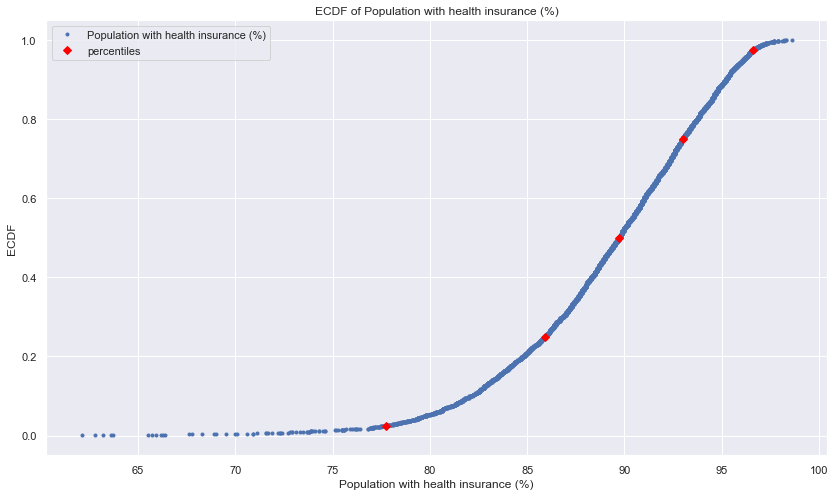

In [4]:
# Column for current pct with health insurance.
col = 'CP03_current_096E'

# Plot the ECDF for this column.
plt.figure(figsize=(14,8))
sf.ecdf_plot(cdr,col,'Population with health insurance (%)')

Keeping in mind the goal of creating a model to predict the change in rate, we should look for features whose values are different depending on which class a particular sample belongs to. So let's take a look at this ECDF again after partitioning the data by the values of the 'rate_change' column.

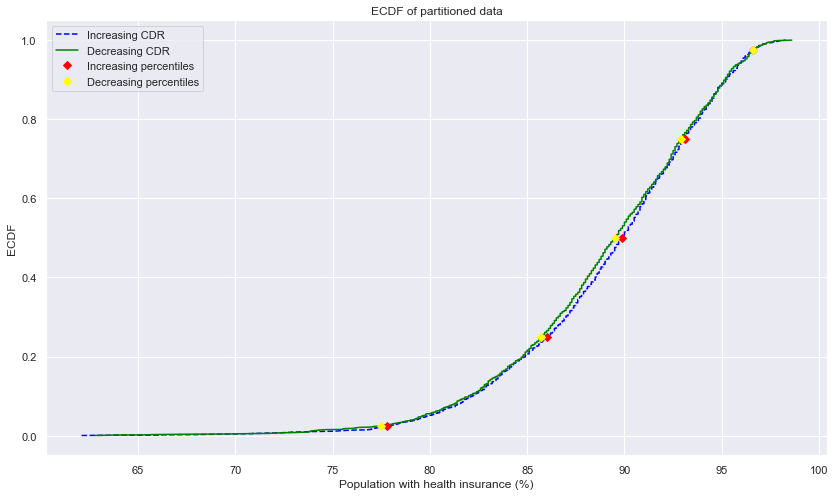

In [5]:
cdr_incr = cdr[cdr.rate_change==1].copy()
cdr_decr = cdr[cdr.rate_change==0].copy()

plt.figure(figsize=(14,8))
sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                   col,loc='upper left',
                   feature_name='Population with health insurance (%)')

The figure seems to indicate a difference between the mean of this variable for the elements of the partition. Can other variables be found that might have different distributions under the partition?

## <u>ECDF of partitioned data</u>

**Educational attainment variables - current value**

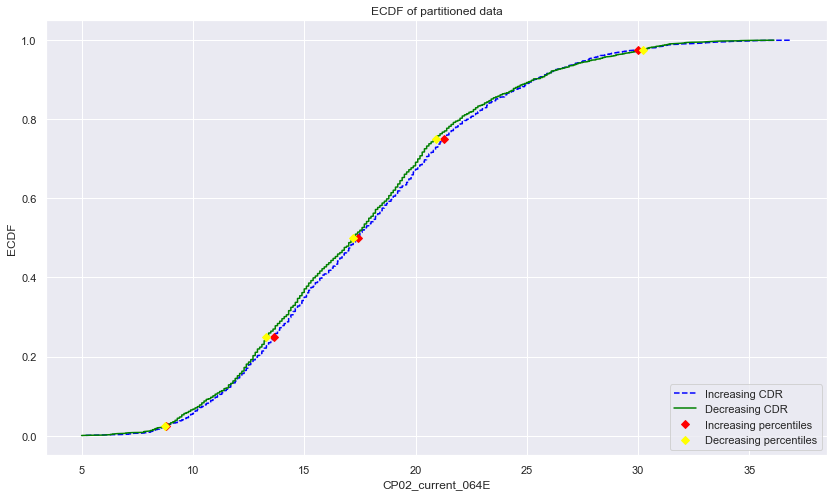

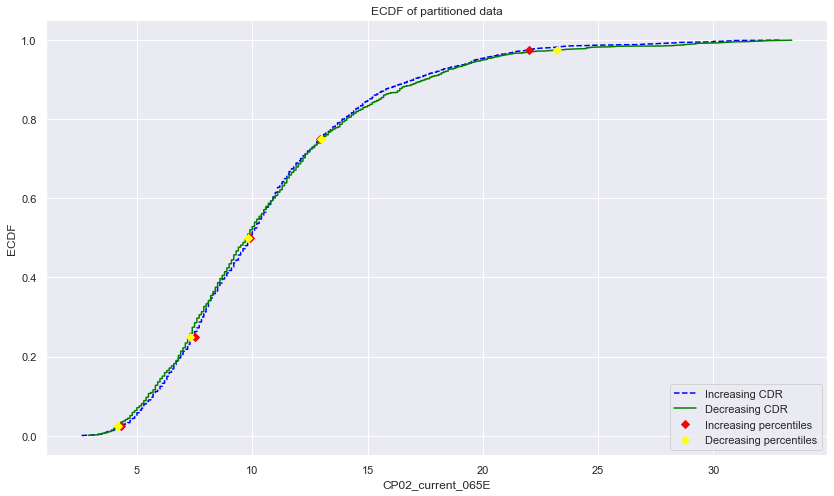

In [6]:
# Create list of social characteristic variables
social = [
    '058','059','060','061',
    '062','063','064','065'
]

social_curr = ['CP02_current_'+code+'E' for code in social]
social_prev = ['CP02_previous_'+code+'E' for code in social]
social_diff = ['CP02_diff_'+code+'E' for code in social]

for code in social_curr[-2:]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)
    

**Educational attainment variables - previous value**

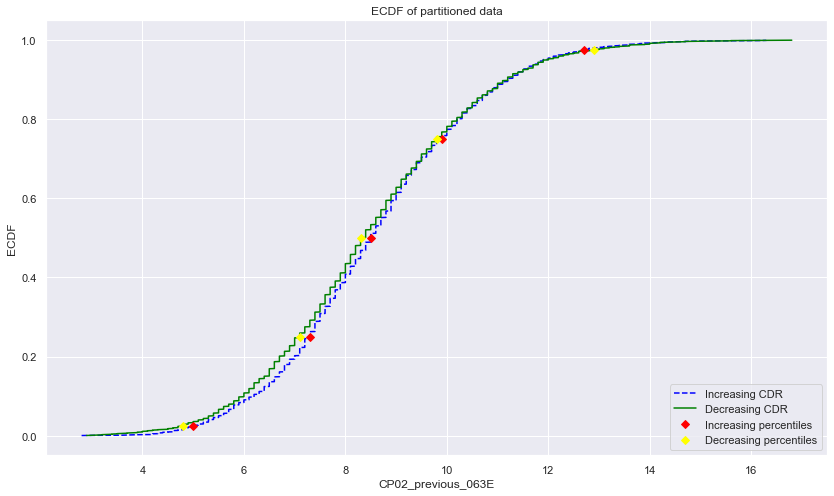

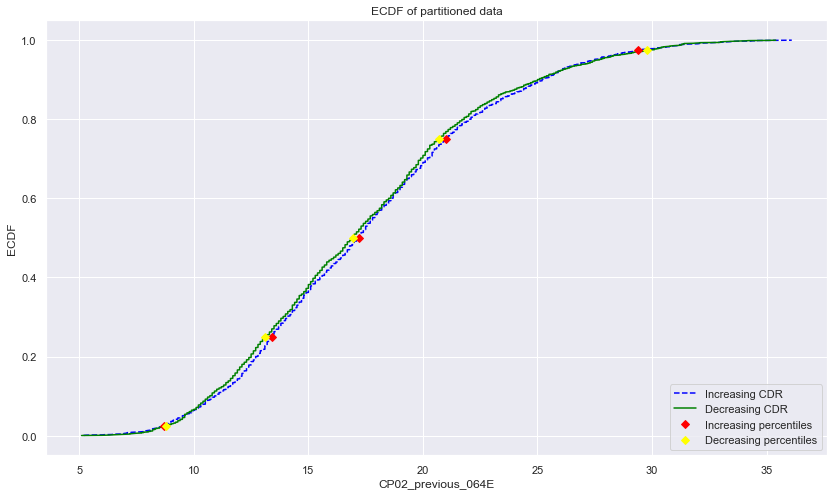

In [7]:
for code in social_prev[-3:-1]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Educational attainment variables - difference**

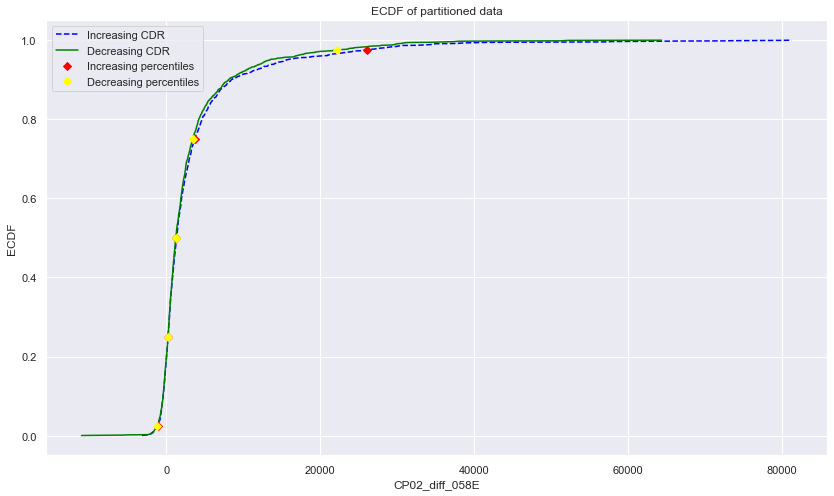

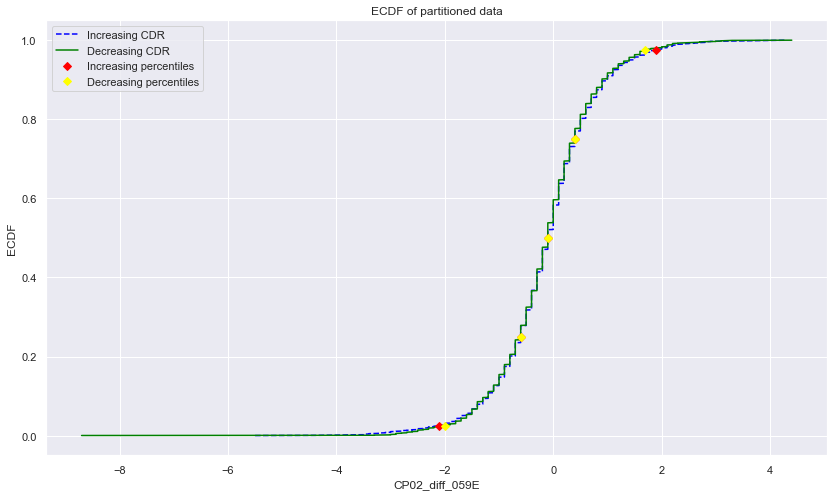

In [8]:
for code in social_diff[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='upper left',
                       feature_name=code)

**Economic variables - current value**

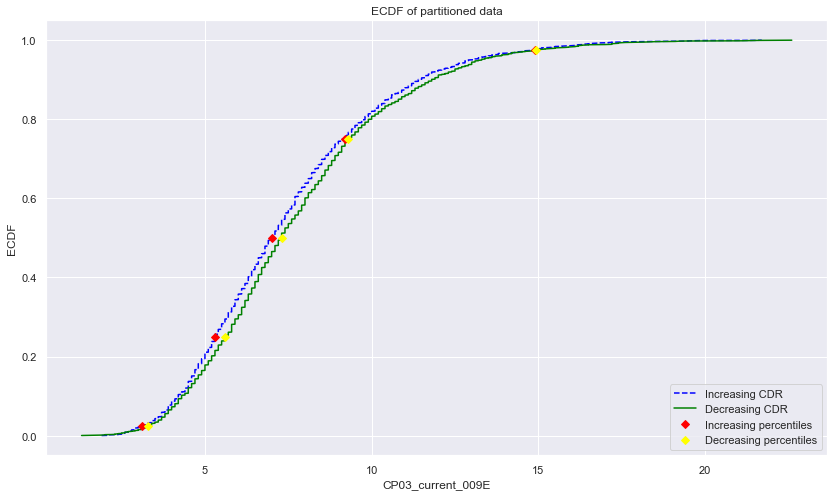

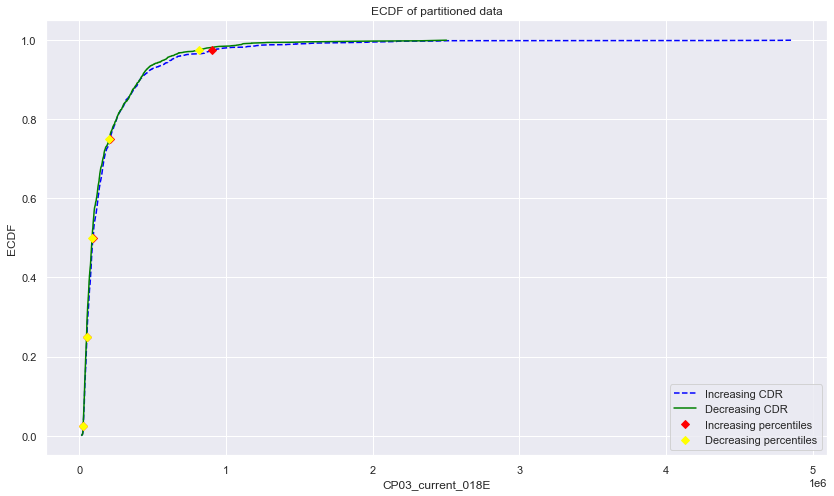

In [9]:
# Create list of economic characteristic variables
economic = [
    '009','018','019','020','021','022','023','024',
    '026','027','028','029','030','031','032','033',
    '034','035','036','037','038','039','040','041',
    '042','043','044','045','051','062','063','064',
    '065','066','067','068','069','070','071','072',
    '073','074','095','096','097','098','099','119',
    '128'
]


economic_curr = ['CP03_current_'+code+'E' for code in economic]
economic_prev = ['CP03_previous_'+code+'E' for code in economic]
economic_diff = ['CP03_diff_'+code+'E' for code in economic]



for code in economic_curr[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Economic variables - previous value**

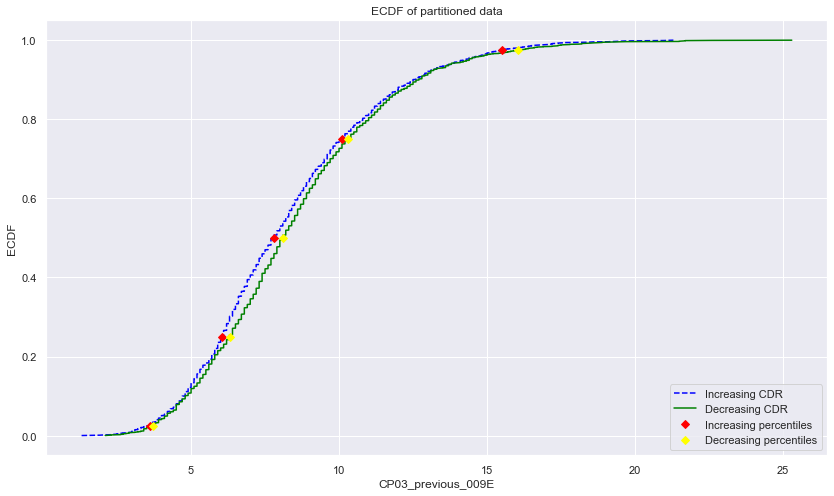

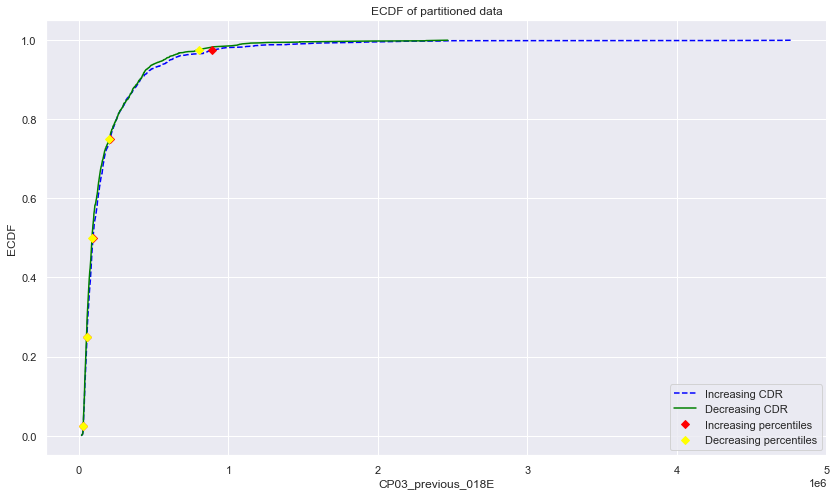

In [10]:
for code in economic_prev[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Economic variables - difference**

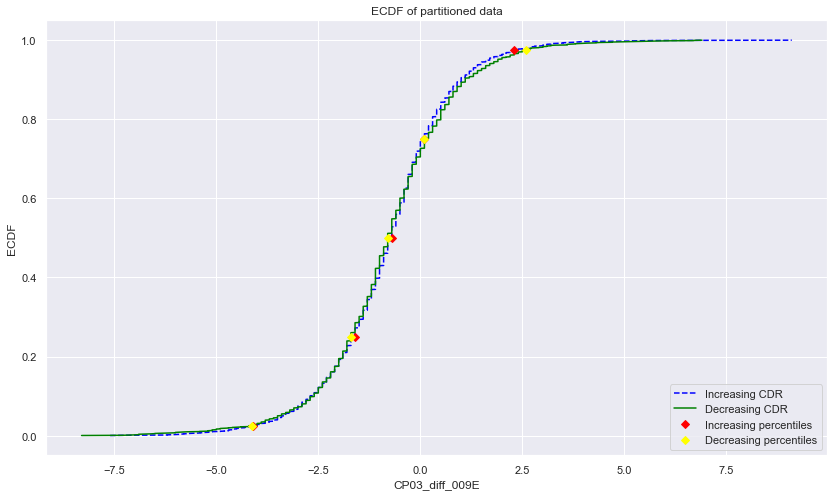

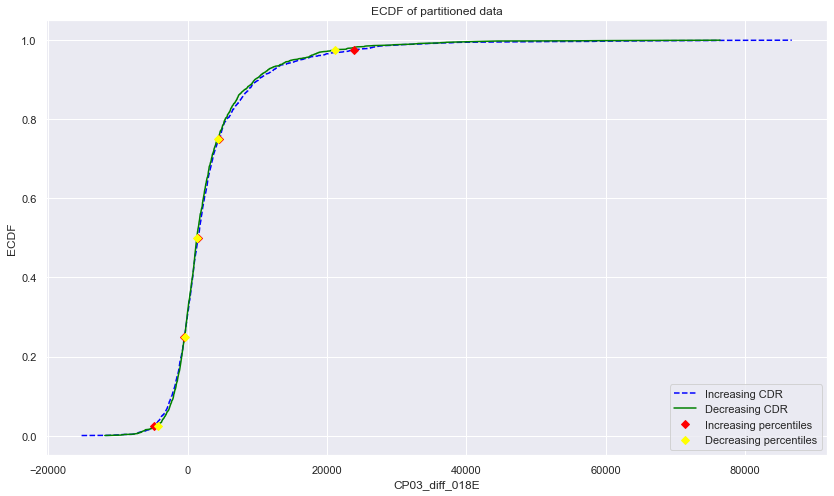

In [11]:
for code in economic_diff[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Housing variables - current value**

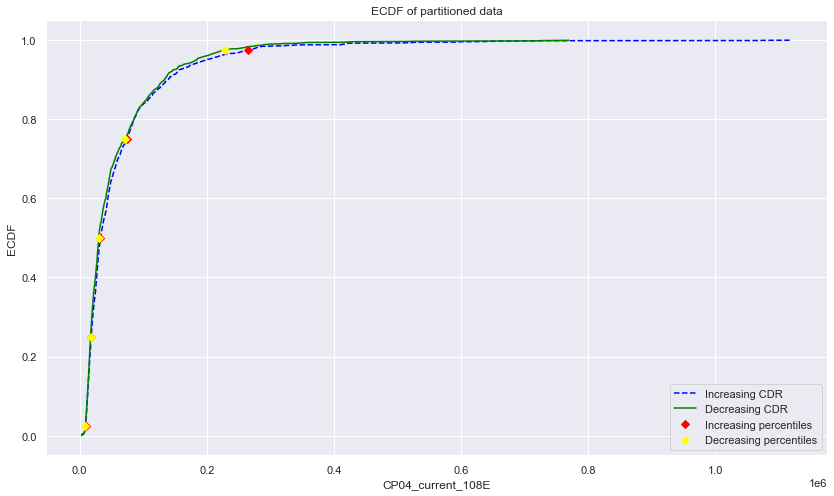

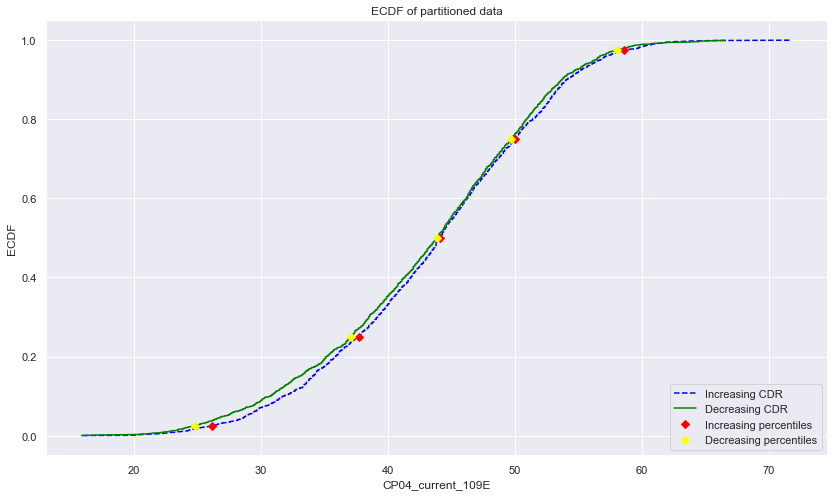

In [12]:
# Create a list of housing characteristic variables
housing = [
    '108','109','110','111',
    '112','113','114','115',
    '116','117','118','119',
    '120','121','122','123',
    '124','132','133','134',
    '135','136','137','138',
    '139','140','141'
]

housing_curr = ['CP04_current_'+code+'E' for code in housing]
housing_prev = ['CP04_previous_'+code+'E' for code in housing]
housing_diff = ['CP04_diff_'+code+'E' for code in housing]


for code in housing_curr[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Housing variables - previous value**

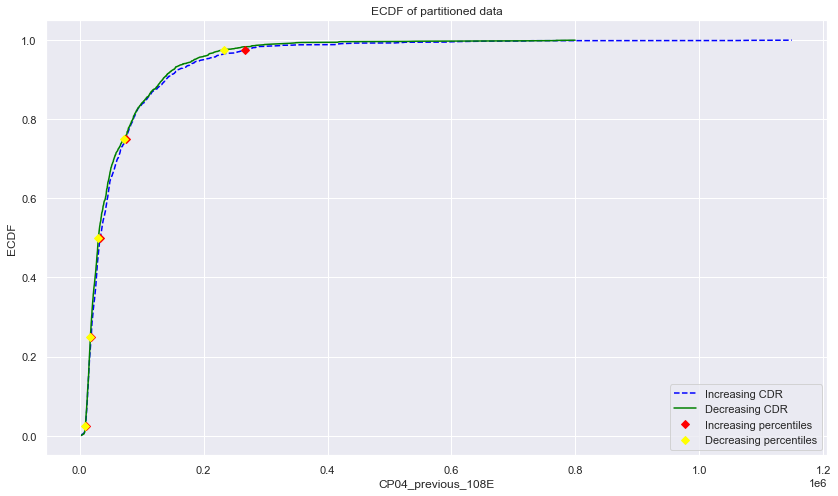

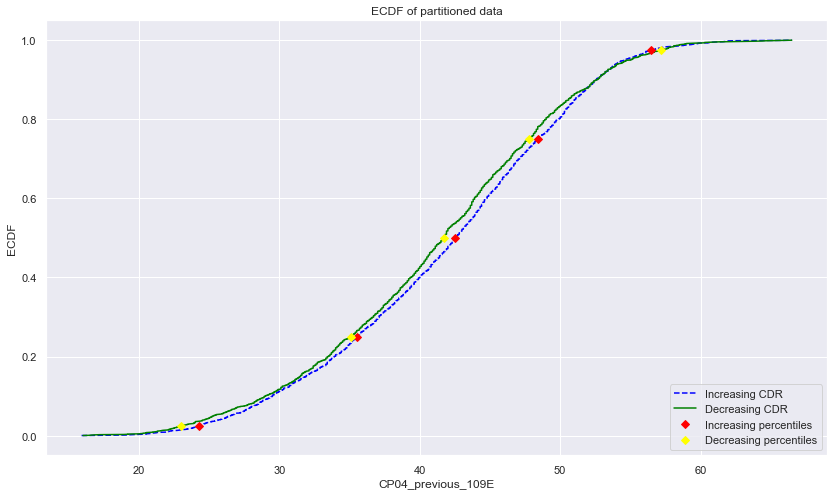

In [13]:
for code in housing_prev[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

**Housing variables - difference**

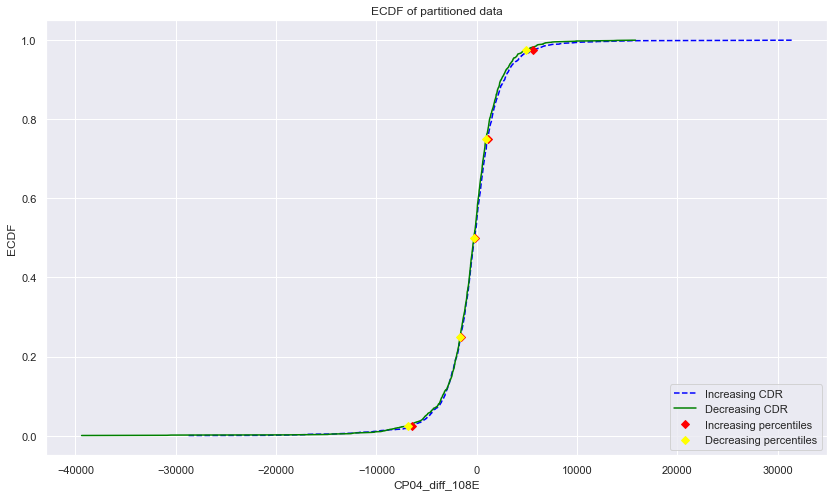

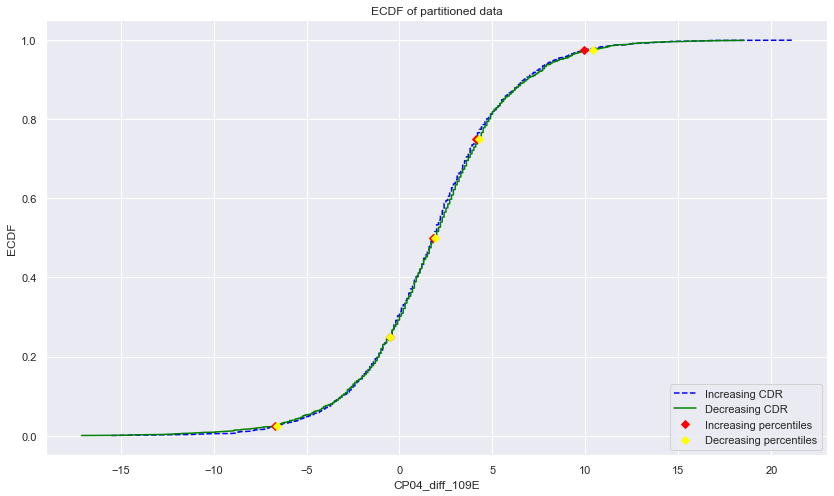

In [14]:
for code in housing_diff[:2]:
    plt.figure(figsize=(14,8))
    sf.feat_ecdf_multi(cdr_incr,cdr_decr,
                       code,loc='lower right',
                       feature_name=code)

Some of these distributions look somewhat different. **Are they different enough to be considered significant**? 

***
**<u>Null hypothesis</u>**

*Let $x_0, x_1$ denote the sets of variable values for counties with non-increased and increased rates, respectively. If there is no difference between these groups for the values of the variables in the dataset, then the difference in the mean of each variable for these groups is zero:*

$D_n \equiv$ Counties with and without increase do not have different distributions for variables

<h1><center>
$D_n \implies \bar{x_1}-\bar{x_0} = 0$
</center></h1>

***
**<u>Alternative hypothesis</u>**

*If variable distributions for counties without increase are different than counties with increase, then the difference in means for at least one variable between these groups is not zero:*

$D_a \equiv$ Counties with and without increase do have different distributions for variables

<h1><center>
$D_a \implies \bar{x_1}-\bar{x_0} \neq 0$
</center></h1>

***



We begin by generating bootstrap replicates under the assumption of the null hypothesis. To do this, the array of values of each variable for both groups must be shifted such that their means are equal. 

In [15]:
# Define function to draw replicates.
def bs_sample(data):
    bs = np.random.choice(data,len(data))
    return bs

# Define function to get replicates of difference in mean.
def bs_diff_means(x_0,x_1):
    # Generate bootstrap samples of arrays
    x0_bs = bs_sample(x_0)
    x1_bs = bs_sample(x_1)
    
    # Return the difference in means
    diff = np.mean(x1_bs) - np.mean(x0_bs)
    return diff

# Define function to get p-value for observed difference.
def get_p_value(col):
    # Get partitioned arrays.
    x0 = cdr[cdr.rate_change==0][col].copy().values
    x1 = cdr[cdr.rate_change==1][col].copy().values
    
    # Get the full variable mean.
    X_mean = np.mean(cdr[col])
    
    # Calculate shifted arrays.
    x0_shifted = x0 - np.mean(x0) + X_mean
    x1_shifted = x1 - np.mean(x1) + X_mean

    # Calculate observed difference in means.
    obs_diff = np.mean(x1) - np.mean(x0)
    
    # Generate 10,000 bootstrap replicates. 
    diff_reps = [bs_diff_means(x0_shifted,x1_shifted) for i in range(10000)]

    # Calculate and return the p-value.
    p = np.sum(diff_reps >= obs_diff)/len(diff_reps)
    return p

In [16]:
# Define the alpha value
alpha = 0.05

cols = social_curr+social_prev+social_diff \
      +economic_curr+economic_prev+economic_diff \
      +housing_curr+housing_prev+housing_diff

sign_cols = {}
for code in cols:
    p = get_p_value(code)
    if p >= alpha:
        continue
    else:
        sign_cols[code] = p

print('{} columns with p < 0.05'.format(len(sign_cols)))

42 columns with p < 0.05


**There are a number of variable columns for which the elements of the partition have different distributions, and this indicates that these features might be useful for training a model.**  